In [1]:
# Include this line to make plots interactive
%matplotlib notebook

In [2]:
#Import dependencies

import requests 
import json
import pandas as pd
import numpy as np
from scipy import stats
from sodapy import Socrata
import matplotlib.pyplot as plt
%matplotlib inline
import gmaps
from pandas.io.json import json_normalize
import csv

#set ggplot style
plt.style.use('ggplot')

In [14]:
# Create a path to the csv and read it into a Pandas DataFrame
csv_path = "Behavioral_Risk_Factor_Data__Tobacco_Use__2011_to_present_.csv"
brfd_df = pd.read_csv(csv_path)

brfd_df



,Year,LocationAbbr,LocationDesc,TopicType,TopicDesc,MeasureDesc,DataSource,Response,Data_Value_Unit,Data_Value_Type,...,GeoLocation,TopicTypeId,TopicId,MeasureId,StratificationID1,StratificationID2,StratificationID3,StratificationID4,SubMeasureID,DisplayOrder
0,2017,US,National Median (States and DC),Tobacco Use – Survey Data,Smokeless Tobacco Use (Adults),User Status,BRFSS,Current,%,Percentage,...,NaN,BEH,150BEH,179SUS,1GEN,8AGE,6RAC,6EDU,BRF80,80
1,2017,US,National Median (States and DC),Tobacco Use – Survey Data,Smokeless Tobacco Use (Adults),User Status,BRFSS,Not Current,%,Percentage,...,NaN,BEH,150BEH,179SUS,1GEN,8AGE,6RAC,6EDU,BRF81,81
2,2012,US,National Median (States and DC),Tobacco Use – Survey Data,Cigarette Use (Adults),Smoking Status,BRFSS,Former,%,Percentage,...,NaN,BEH,100BEH,165SSA,1GEN,8AGE,6RAC,6EDU,BRF28,28
3,2012,US,National Median (States and DC),Tobacco Use – Survey Data,Cigarette Use (Adults),Smoking Status,BRFSS,Never,%,Percentage,...,NaN,BEH,100BEH,165SSA,1GEN,8AGE,6RAC,6EDU,BRF29,29
4,2012,US,National Median (States and DC),Tobacco Use – Survey Data,Smokeless Tobacco Use (Adults),Current Use,BRFSS,NaN,%,Percentage,...,NaN,BEH,150BEH,177SCU,1GEN,8AGE,6RAC,6EDU,BRF67,67
5,2012,US,National Median (States and DC),Tobacco Use – Survey Data,Smokeless Tobacco Use (Adults),User Status,BRFSS,Current,%,Percentage,...,NaN,BEH,150BEH,179SUS,1GEN,8AGE,6RAC,6EDU,BRF80,80
6,2012,US,National Median (States and DC),Tobacco Use – Survey Data,Smokeless Tobacco Use (Adults),User Status,BRFSS,Not Current,%,Percentage,...,NaN,BEH,150BEH,179SUS,1GEN,8AGE,6RAC,6EDU,BRF81,81
7,2016-2017,AL,Alabama,Tobacco Use – Survey Data,Cigarette Use (Adults),Current Smoking – (2 yrs – Race/Ethnicity),BRFSS,NaN,%,Percentage,...,"(32.84057112200048, -86.63186076199969)",BEH,100BEH,112CS2,1GEN,8AGE,5RAC,6EDU,BRF34,34
8,2016-2017,AL,Alabama,Tobacco Use – Survey Data,Cigarette Use (Adults),Current Smoking – (2 yrs – Race/Ethnicity),BRFSS,NaN,%,Percentage,...,"(32.84057112200048, -86.63186076199969)",BEH,100BEH,112CS2,1GEN,8AGE,1RAC,6EDU,BRF30,30
9,2016-2017,AL,Alabama,Tobacco Use – Survey Data,Cigarette Use (Adults),Current Smoking – (2 yrs – Race/Ethnicity),BRFSS,NaN,%,Percentage,...,"(32.84057112200048, -86.63186076199969)",BEH,100BEH,112CS2,1GEN,8AGE,4RAC,6EDU,BRF33,33


In [4]:
# NOTE in counts not all columns have the same counts Missing values in some and exceeding expected values in others. 

brfd_df.count()

Year                          33451
LocationAbbr                  33451
LocationDesc                  33451
TopicType                     33451
TopicDesc                     33451
MeasureDesc                   33451
DataSource                    33451
Response                      11648
Data_Value_Unit               33451
Data_Value_Type               33451
Data_Value                    31908
Data_Value_Footnote_Symbol     1543
Data_Value_Footnote            1543
Data_Value_Std_Err            31847
Low_Confidence_Limit          31847
High_Confidence_Limit         31847
Sample_Size                   31847
Gender                        33451
Race                          33451
Age                           33451
Education                     33451
GeoLocation                   33390
TopicTypeId                   33451
TopicId                       33451
MeasureId                     33451
StratificationID1             33451
StratificationID2             33451
StratificationID3           

In [5]:
brfd_df.columns

Index(['Year', 'LocationAbbr', 'LocationDesc', 'TopicType', 'TopicDesc',
       'MeasureDesc', 'DataSource', 'Response', 'Data_Value_Unit',
       'Data_Value_Type', 'Data_Value', 'Data_Value_Footnote_Symbol',
       'Data_Value_Footnote', 'Data_Value_Std_Err', 'Low_Confidence_Limit',
       'High_Confidence_Limit', 'Sample_Size', 'Gender', 'Race', 'Age',
       'Education', 'GeoLocation', 'TopicTypeId', 'TopicId', 'MeasureId',
       'StratificationID1', 'StratificationID2', 'StratificationID3',
       'StratificationID4', 'SubMeasureID', 'DisplayOrder'],
      dtype='object')

In [6]:
# Rename columns df.drop(columns=['B', 'C'])
brfd_updated_df = brfd_df.drop(columns=['TopicTypeId', 'TopicId', 'MeasureId',
       'StratificationID1', 'StratificationID2', 'StratificationID3',
       'StratificationID4', 'SubMeasureID', 'DisplayOrder', 'Data_Value_Footnote_Symbol',
       'Data_Value_Footnote', 'Data_Value_Std_Err', 'Low_Confidence_Limit',
       'High_Confidence_Limit','Data_Value_Unit','Data_Value_Type',])

brfd_updated_df.head()


,Year,LocationAbbr,LocationDesc,TopicType,TopicDesc,MeasureDesc,DataSource,Response,Data_Value,Sample_Size,Gender,Race,Age,Education,GeoLocation
0,2017,US,National Median (States and DC),Tobacco Use – Survey Data,Smokeless Tobacco Use (Adults),User Status,BRFSS,Current,4.0,NaN,Overall,All Races,All Ages,All Grades,NaN
1,2017,US,National Median (States and DC),Tobacco Use – Survey Data,Smokeless Tobacco Use (Adults),User Status,BRFSS,Not Current,96.0,NaN,Overall,All Races,All Ages,All Grades,NaN
2,2012,US,National Median (States and DC),Tobacco Use – Survey Data,Cigarette Use (Adults),Smoking Status,BRFSS,Former,25.2,NaN,Overall,All Races,All Ages,All Grades,NaN
3,2012,US,National Median (States and DC),Tobacco Use – Survey Data,Cigarette Use (Adults),Smoking Status,BRFSS,Never,54.4,NaN,Overall,All Races,All Ages,All Grades,NaN
4,2012,US,National Median (States and DC),Tobacco Use – Survey Data,Smokeless Tobacco Use (Adults),Current Use,BRFSS,NaN,4.1,NaN,Overall,All Races,All Ages,All Grades,NaN


In [7]:
# Describe of full data

brfd_updated_df.describe()

,Data_Value
count,31908.000000
mean,25.552285
std,25.008653
min,0.000000
25%,5.100000
50%,17.600000
75%,39.500000
max,99.900000


In [8]:
brfd_updated_df[['Data_Value']]=brfd_updated_df[['Data_Value']].astype(float)
brfd_updated_df.head()

,Year,LocationAbbr,LocationDesc,TopicType,TopicDesc,MeasureDesc,DataSource,Response,Data_Value,Sample_Size,Gender,Race,Age,Education,GeoLocation
0,2017,US,National Median (States and DC),Tobacco Use – Survey Data,Smokeless Tobacco Use (Adults),User Status,BRFSS,Current,4.0,NaN,Overall,All Races,All Ages,All Grades,NaN
1,2017,US,National Median (States and DC),Tobacco Use – Survey Data,Smokeless Tobacco Use (Adults),User Status,BRFSS,Not Current,96.0,NaN,Overall,All Races,All Ages,All Grades,NaN
2,2012,US,National Median (States and DC),Tobacco Use – Survey Data,Cigarette Use (Adults),Smoking Status,BRFSS,Former,25.2,NaN,Overall,All Races,All Ages,All Grades,NaN
3,2012,US,National Median (States and DC),Tobacco Use – Survey Data,Cigarette Use (Adults),Smoking Status,BRFSS,Never,54.4,NaN,Overall,All Races,All Ages,All Grades,NaN
4,2012,US,National Median (States and DC),Tobacco Use – Survey Data,Smokeless Tobacco Use (Adults),Current Use,BRFSS,NaN,4.1,NaN,Overall,All Races,All Ages,All Grades,NaN


In [25]:
# seperate US data from individual state data
# do we need to drop null data?
brfd_states_df = brfd_updated_df[~brfd_updated_df['LocationAbbr'].isin(['US'])]
brfd_states_df.head()

   


,Year,LocationAbbr,LocationDesc,TopicType,TopicDesc,MeasureDesc,DataSource,Response,Data_Value,Sample_Size,Gender,Race,Age,Education,GeoLocation
7,2016-2017,AL,Alabama,Tobacco Use – Survey Data,Cigarette Use (Adults),Current Smoking – (2 yrs – Race/Ethnicity),BRFSS,NaN,21.6,"8,973",Overall,White,All Ages,All Grades,"(32.84057112200048, -86.63186076199969)"
8,2016-2017,AL,Alabama,Tobacco Use – Survey Data,Cigarette Use (Adults),Current Smoking – (2 yrs – Race/Ethnicity),BRFSS,NaN,19.9,"3,385",Overall,African American,All Ages,All Grades,"(32.84057112200048, -86.63186076199969)"
9,2016-2017,AL,Alabama,Tobacco Use – Survey Data,Cigarette Use (Adults),Current Smoking – (2 yrs – Race/Ethnicity),BRFSS,NaN,18.3,162,Overall,Hispanic,All Ages,All Grades,"(32.84057112200048, -86.63186076199969)"
10,2016-2017,AL,Alabama,Tobacco Use – Survey Data,Cigarette Use (Adults),Current Smoking – (2 yrs – Race/Ethnicity),BRFSS,NaN,24.0,154,Overall,Asian/Pacific Islander,All Ages,All Grades,"(32.84057112200048, -86.63186076199969)"
11,2016-2017,AL,Alabama,Tobacco Use – Survey Data,Cigarette Use (Adults),Current Smoking – (2 yrs – Race/Ethnicity),BRFSS,NaN,39.0,82,Overall,American Indian/Alaska Native,All Ages,All Grades,"(32.84057112200048, -86.63186076199969)"


In [27]:
brfd_gender_df = brfd_states_df[~brfd_states_df['Gender'].isin(['Overall'])]
brfd_gender_df.head()

,Year,LocationAbbr,LocationDesc,TopicType,TopicDesc,MeasureDesc,DataSource,Response,Data_Value,Sample_Size,Gender,Race,Age,Education,GeoLocation
105,2017,AL,Alabama,Tobacco Use – Survey Data,Cigarette Use (Adults),Smoking Status,BRFSS,Current,23.4,"2,598",Male,All Races,All Ages,All Grades,"(32.84057112200048, -86.63186076199969)"
264,2017,AL,Alabama,Tobacco Use – Survey Data,Cigarette Use (Adults),Smoking Status,BRFSS,Current,18.7,"3,871",Female,All Races,All Ages,All Grades,"(32.84057112200048, -86.63186076199969)"
282,2017,AL,Alabama,Tobacco Use – Survey Data,Cigarette Use (Adults),Smoking Status,BRFSS,Former,29.3,"2,598",Male,All Races,All Ages,All Grades,"(32.84057112200048, -86.63186076199969)"
407,2017,AL,Alabama,Tobacco Use – Survey Data,Cigarette Use (Adults),Smoking Status,BRFSS,Former,18.1,"3,871",Female,All Races,All Ages,All Grades,"(32.84057112200048, -86.63186076199969)"
425,2017,AL,Alabama,Tobacco Use – Survey Data,Cigarette Use (Adults),Smoking Status,BRFSS,Never,47.3,"2,598",Male,All Races,All Ages,All Grades,"(32.84057112200048, -86.63186076199969)"


In [28]:
brfd_race_df = brfd_gender_df[~brfd_gender_df['Race'].isin(['All Races'])]
brfd_states_df.head()

,Year,LocationAbbr,LocationDesc,TopicType,TopicDesc,MeasureDesc,DataSource,Response,Data_Value,Sample_Size,Gender,Race,Age,Education,GeoLocation
7,2016-2017,AL,Alabama,Tobacco Use – Survey Data,Cigarette Use (Adults),Current Smoking – (2 yrs – Race/Ethnicity),BRFSS,NaN,21.6,"8,973",Overall,White,All Ages,All Grades,"(32.84057112200048, -86.63186076199969)"
8,2016-2017,AL,Alabama,Tobacco Use – Survey Data,Cigarette Use (Adults),Current Smoking – (2 yrs – Race/Ethnicity),BRFSS,NaN,19.9,"3,385",Overall,African American,All Ages,All Grades,"(32.84057112200048, -86.63186076199969)"
9,2016-2017,AL,Alabama,Tobacco Use – Survey Data,Cigarette Use (Adults),Current Smoking – (2 yrs – Race/Ethnicity),BRFSS,NaN,18.3,162,Overall,Hispanic,All Ages,All Grades,"(32.84057112200048, -86.63186076199969)"
10,2016-2017,AL,Alabama,Tobacco Use – Survey Data,Cigarette Use (Adults),Current Smoking – (2 yrs – Race/Ethnicity),BRFSS,NaN,24.0,154,Overall,Asian/Pacific Islander,All Ages,All Grades,"(32.84057112200048, -86.63186076199969)"
11,2016-2017,AL,Alabama,Tobacco Use – Survey Data,Cigarette Use (Adults),Current Smoking – (2 yrs – Race/Ethnicity),BRFSS,NaN,39.0,82,Overall,American Indian/Alaska Native,All Ages,All Grades,"(32.84057112200048, -86.63186076199969)"


In [ ]:
brfd_race_df = brfd_gender_df[~brfd_gender_df['Race'].isin(['All Races'])]
brfd_states_df.head()

In [21]:
grouped_brfd_df = brfd_updated_df.groupby(['Year','Gender']).mean()
grouped_brfd_df.head()

Data_Value
Year Gender             
2011 Female    35.615441
     Male      41.318254
     Overall   22.454872
     Female    35.485930
     Male      41.272531

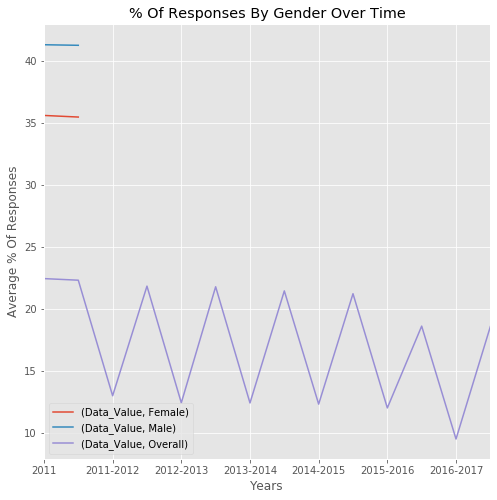

In [10]:
# Use unstack() to Plot all users response as a line chart  

#Issues with DATES, GROUPED values need re-working

fig, ax = plt.subplots(figsize=(8,8))
grouped_brfd_df.unstack().plot(ax=ax)
plt.title("% Of Responses By Gender Over Time")
plt.xlabel("Years")
plt.ylabel("Average % Of Responses")
leg = ax.legend()



In [11]:
#Forming DataFrame for Just E-Cigarette User Responses over USA
brfd_eCig=brfd_updated_df.loc[brfd_updated_df["TopicDesc"] ==("E-Cigarette Use (Adults)")]
brfd_eCig.head()

,Year,LocationAbbr,LocationDesc,TopicType,TopicDesc,MeasureDesc,DataSource,Response,Data_Value,Sample_Size,Gender,Race,Age,Education,GeoLocation
12,2016-2017,AL,Alabama,Tobacco Use – Survey Data,E-Cigarette Use (Adults),Current Use – (2 yrs – Race/Ethnicity),BRFSS,NaN,5.7,"8,963",Overall,White,All Ages,All Grades,"(32.84057112200048, -86.63186076199969)"
13,2016-2017,AL,Alabama,Tobacco Use – Survey Data,E-Cigarette Use (Adults),Current Use – (2 yrs – Race/Ethnicity),BRFSS,NaN,2.6,"3,374",Overall,African American,All Ages,All Grades,"(32.84057112200048, -86.63186076199969)"
14,2016-2017,AL,Alabama,Tobacco Use – Survey Data,E-Cigarette Use (Adults),Current Use – (2 yrs – Race/Ethnicity),BRFSS,NaN,3.8,162,Overall,Hispanic,All Ages,All Grades,"(32.84057112200048, -86.63186076199969)"
16,2016-2017,AL,Alabama,Tobacco Use – Survey Data,E-Cigarette Use (Adults),Current Use – (2 yrs – Race/Ethnicity),BRFSS,NaN,9.8,154,Overall,Asian/Pacific Islander,All Ages,All Grades,"(32.84057112200048, -86.63186076199969)"
17,2016-2017,AL,Alabama,Tobacco Use – Survey Data,E-Cigarette Use (Adults),Current Use – (2 yrs – Race/Ethnicity),BRFSS,NaN,8.7,82,Overall,American Indian/Alaska Native,All Ages,All Grades,"(32.84057112200048, -86.63186076199969)"


In [12]:
# Finding Average & Using GroupBy in order to separate the data into fields according to "Year and "Gender" values
brfd_eCig_Avg = brfd_eCig.groupby(['Year','Gender']).mean()
brfd_eCig_Avg

Data_Value
Year      Gender             
2016      Female    29.359229
          Male      33.966346
          Overall   13.500094
2016-2017 Overall    4.987251
2017      Female    29.369421
          Male      33.851935
          Overall   13.432463

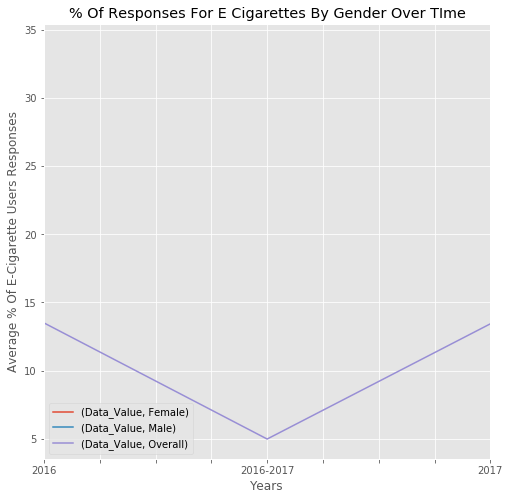

In [13]:
# Use unstack() to Plot the E-Cigarette users response as a line chart

fig, ax = plt.subplots(figsize=(8,8))
brfd_eCig_Avg.unstack().plot(ax=ax)
plt.title("% Of Responses For E Cigarettes By Gender Over TIme")
plt.xlabel("Years")
plt.ylabel("Average % Of E-Cigarette Users Responses")
leg = ax.legend()


In [59]:
grouped_brfd_Ethnicity = brfd_updated_df.groupby(['Year','Race']).mean()
grouped_brfd_Ethnicity.head()

Data_Value
Year Race                                     
2011 African American                15.021429
     All Races                       30.764360
     American Indian/Alaska Native   20.120000
     Asian/Pacific Islander           9.758333
     Hispanic                        13.715789

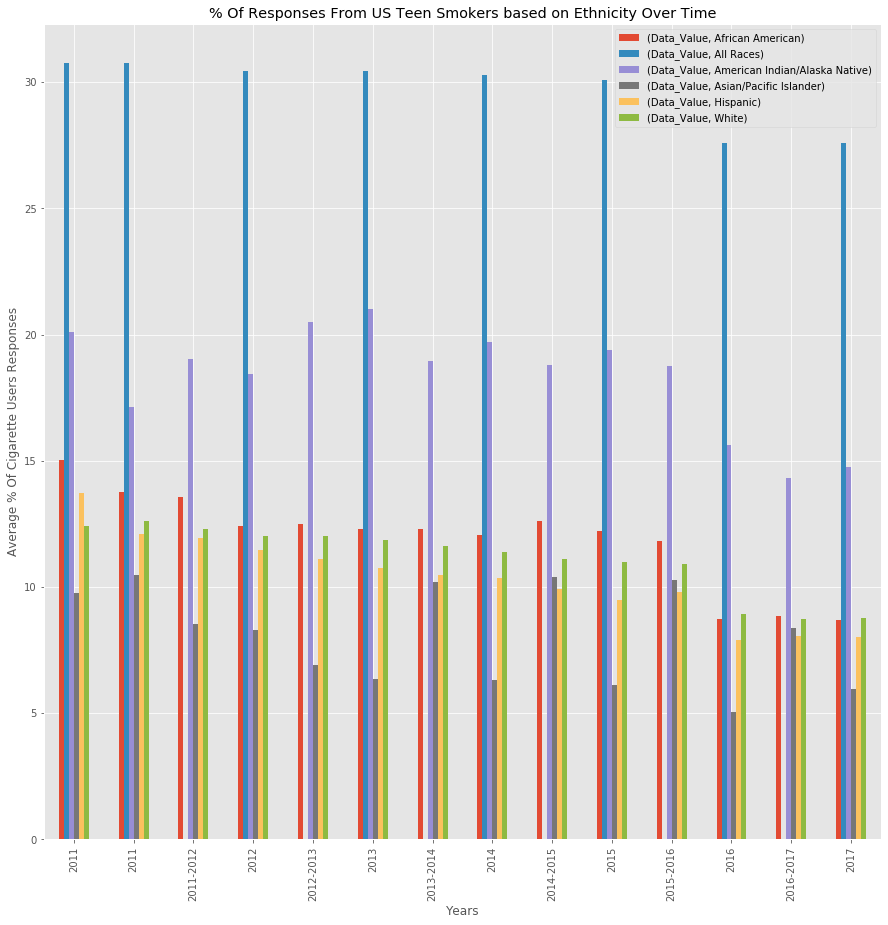

In [57]:
fig, ax = plt.subplots(figsize=(15,15))
grouped_brfd_Ethnicity.unstack().plot.bar(ax=ax)
plt.title("% Of Responses From US Smokers based on Ethnicity Over Time")
plt.xlabel("Years")
plt.ylabel("Average % Of Cigarette Users Responses")
leg = ax.legend()

In [60]:
brfd_eCig_Ethnicity = brfd_eCig.groupby(['Year','Race']).mean()
brfd_eCig_Ethnicity.head()

Data_Value
Year Race                                     
2016 African American                 3.751220
     All Races                       22.715157
     American Indian/Alaska Native    7.577143
     Asian/Pacific Islander           3.850000
     Hispanic                         4.253846

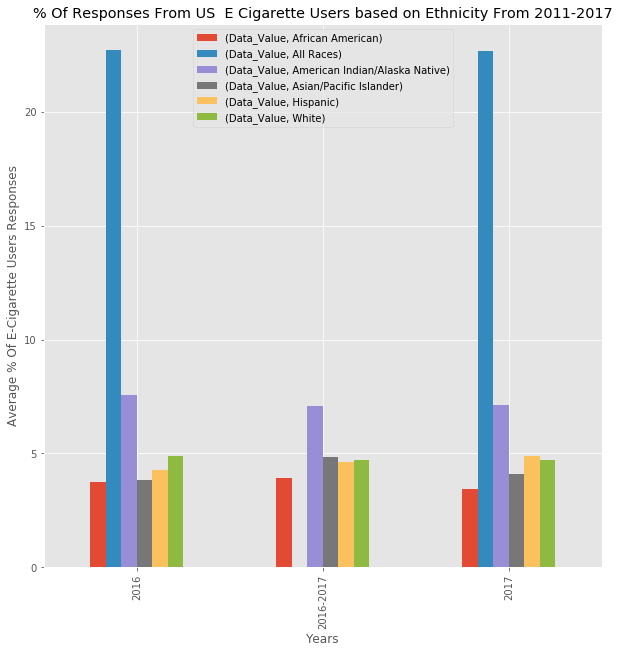

In [61]:
fig, ax = plt.subplots(figsize=(10,10))
brfd_eCig_Ethnicity.unstack().plot.bar(ax=ax)
plt.title("% Of Responses From US  E Cigarette Users based on Ethnicity From 2011-2017")
plt.xlabel("Years")
plt.ylabel("Average % Of E-Cigarette Users Responses")
leg = ax.legend()